   # Document clustering using k-means using sklearn

In [2]:
import string
from pdfminer.pdfparser import PDFParser
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import XMLConverter, HTMLConverter, TextConverter
from pdfminer.image import ImageWriter
from pdfminer.layout import LAParams

import io
import os

import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import numpy as np
import pandas as pd

import json
from pathlib import *

import time

from random import randint

from nltk.corpus import wordnet

import operator

from nltk.chunk import tree2conlltags
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

import re

import numpy as np

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Pooja Ajit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Pooja
[nltk_data]     Ajit\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Pooja
[nltk_data]     Ajit\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
def processData(rawContents):    
    cleaned = tokenizeContent(rawContents)    
    cleaned1 = removeStopWordsFromTokenized(cleaned)    
    cleaned2 = performPorterStemmingOnContents(cleaned1)    
    cleaned3 = removePunctuationFromTokenized(cleaned2)    
    cleaned4 = convertItemsToLower(cleaned3)    
    return cleaned4    
        
def tokenizeContent(contentsRaw):    
    tokenized = nltk.tokenize.sent_tokenize(contentsRaw)    
    return tokenized    
    
def removeStopWordsFromTokenized(contentsTokenized):    
    stop_word_set = set(nltk.corpus.stopwords.words("english"))    
    filteredContents = [word for word in contentsTokenized if word not in stop_word_set]    
    return filteredContents    
    
def performPorterStemmingOnContents(contentsTokenized):    
    porterStemmer = nltk.stem.PorterStemmer()    
    filteredContents = [porterStemmer.stem(word) for word in contentsTokenized]    
    return filteredContents    
    
def removePunctuationFromTokenized(contentsTokenized):    
    excludePuncuation = set(string.punctuation)    
    
    # manually add additional punctuation to remove    
    doubleSingleQuote = '\'\''    
    doubleDash = '--'    
    doubleTick = '``'    
    
    excludePuncuation.add(doubleSingleQuote)    
    excludePuncuation.add(doubleDash)    
    excludePuncuation.add(doubleTick)    
    
    filteredContents = [word for word in contentsTokenized if word not in excludePuncuation]    
    return filteredContents    
    
def convertItemsToLower(contentsRaw):    
    filteredContents = [term.lower() for term in contentsRaw]    
    return filteredContents


In [22]:
def pdfRender():
    global documentSet
    global mydoc
    mydoc ={}
    pdf_files =[]
    allLines =[]
    FILE_PATH = Path(r'SLR1_EVALUATION_PAPERS')
    #FILE_PATH = Path('E:/MasterThesis/FinalPapers')
    pdf_files = list(FILE_PATH.glob('*.pdf'))
    #An Array which stores the full text of each document
    documentSet = pdfparser(pdf_files)
    mydoc = dict(zip(pdf_files,documentSet))
    #print(len(documentSet))
    return documentSet

In [23]:
def pdfparser(pdffileS):    
    global dataset_dict
    global finalDocumentSet
    finalDocumentSet = []
    dataset_dict = {'filename': [] , 'docs': []}
    global pdfEx
    docs = []
    global fullText 
    for pdffile in pdffileS:
        #full= fullText
        # Create a example words list(Please add all the related keywords needed)
        words_list = [ "Abstract", "Introduction", "INTRODUCTION", "Motivation", "Description", "Overview", "Background", "BACKGROUND", "METHODOLOGY", "Methods", 
                      "FUTURE DIRECTIONS", "Conclusion", "Conclusions", "CONCLUSION",  "CONCLUSIONS", "Concluding", "CONCLUDING", "Summary and conclusions", "Summary", 
                      "Acknowledgements", "Discussions and conclusions", "References", "REFERENCES"]
        #print(words_list)
        with open(pdffile, mode='rb') as f:      
            fullText = np.array([])
            pdfName = os.path.basename(pdffile)      
            dataset_dict['filename'].append(pdfName)
            print(pdfName)
            #documents = fullText
            #words_list = []
            #print(words_list)
            #fp = open(data, 'rb')
            rsrcmgr = PDFResourceManager()
            retstr = io.StringIO()
            codec = 'utf-8'
            laparams = LAParams()
            data =[]
            details_page = []
            abstract = []
            device = TextConverter(rsrcmgr, retstr, laparams=laparams)
            # Create a PDF interpreter object.
            interpreter = PDFPageInterpreter(rsrcmgr, device)
            # Process each page contained in the document.
            count = 0
            for page in PDFPage.get_pages(f):
                interpreter.process_page(page)
                data = retstr.getvalue()
                details_page.append(data)

            #print("There are", len(words_list), "in the words list")
            stri = " "
            details = stri.join(details_page)
            words = details.split()
            place = []
            dummy_check = []
            removed_words = []

            print(words_list)
            for c, a in enumerate(words):
                for b in words_list:
                    if b == a and b not in dummy_check:
                        print(b, a)
                        place.append(details.find("{}".format(b)))
                        dummy_check.append(b)
                    #  place.append(words.index(a))
                    elif b not in words:
                        print(b)
                        removed_words.append(b)
                        words_list.remove(b)
                        print("The word", b, "was not found in the pdf file")

            #print(list(zip(words_list, place)))
            final_array = list(zip(words_list, place))
            #final_array.sort()
            final_array.sort(key=operator.itemgetter(1))
            # print("Sorting the final array")
            #print(final_array)

            # print("Extracting the relevant texts from pdf")
            # print(" ")
            print(final_array)
            if len(final_array) > 1:
                listint = final_array[0]
                list2int = final_array[1]
                counter = 0

                for each in (final_array):
                    if counter < len(final_array) - 2:
                        new = (details.split(listint[0])[1].split(list2int[0])[0])
                        #new = sent_tokenize(new)
                        #print(listint[0], ":", [' '.join(new)])
                        #print(" ")
                        #print(new)
                        #documents.append(new)
                        fullText = np.append(fullText, new)
                        counter = counter + 1
                        listint = final_array[0 + counter]
                        list2int = final_array[1 + counter]

                    elif counter < len(final_array) - 1:
                        new = (details.split(final_array[counter][0])[1].split(final_array[counter + 1][0])[0])
                        #new = sent_tokenize(new)
                        #documents.append(new)
                        fullText = np.append(fullText, new)
                        #print(final_array[counter][0], ":", [' '.join(new)])
                        #print(" ")
                        counter = counter + 1

                    else:
                        new = (details.split(final_array[counter][0])[1])
                        #new = sent_tokenize(new)
                        #documents.append(new)
                        fullText = np.append(fullText, new)
                        #print(final_array[counter][0], ":", [' '.join(new)])
                        #print(" ")
            else:
                new = (details.split(final_array[0][0])[1])
                # new = sent_tokenize(new)
                #documents.append(new)
                fullText = np.append(fullText, new)
                #print(final_array[counter][0], ":", [' '.join(new)])
                #print(" ")
           
            
                
        #finalDocumentSet = {pdfName : fullText}
        
        data=finalDocumentSet.append(fullText)
        data = str(data)
        
        data = processData(data)
        #data = data.replace(r'\\n', "")
        data = [i.replace('\\n', "") for i in data]
        data = [i.replace('\\x0', "") for i in data]
        words_list = words_list + removed_words
        print("Updated words list:")
        print(words_list)
        
        dataset_dict['docs'].append(fullText)

    #print(len(finalDocumentSet))
    
    #mydoc = dict(zip(myName,data))
    return data


In [25]:
pdfRender()

11-The-scope-of-application-of-multi-agent-systems-in-the-process-industry-Three-case-studies.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
INTRODUCTION
The word INTRODUCTION was not found in the pdf file
Overview
The word Overview was not found in the pdf file
BACKGROUND
The word BACKGROUND was not found in the pdf file
Methods
The word Methods was not found in the pdf file
Conclusion
The word Conclusion was not found in the pdf file
CONCLUSION
The word CONCLUSION was not found in the pdf file
Concluding
The word Concluding was not found in the pdf file
Summary and conclusions
The word Summary and conclusions was not found in the pdf file
Discussions and conclusions
Th

Introduction Introduction
Motivation Motivation
Conclusion Conclusion
Acknowledgements Acknowledgements
References References
Methods Methods
[('Abstract', 301), ('Introduction', 1714), ('Motivation', 8741), ('Methods', 133952), ('Conclusion', 162881), ('Acknowledgements', 162920), ('References', 164408)]
Updated words list:
['Abstract', 'Introduction', 'Motivation', 'Methods', 'Conclusion', 'Acknowledgements', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'REFERENCES', 'Overview', 'CONCLUSION', 'Summary and conclusions', 'BACKGROUND', 'Concluding']
An_ontology-based_collaborative_service-oriented_simulation_framework_with_Microsoft_Robotics_Studio.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 

Introduction Introduction
Overview Overview
Summary Summary
Acknowledgements Acknowledgements
References References
Methods Methods
[('Abstract', 474), ('Introduction', 1779), ('Overview', 12747), ('Methods', 132929), ('Summary', 355441), ('Acknowledgements', 355873), ('References', 356022)]
Updated words list:
['Abstract', 'Introduction', 'Overview', 'Methods', 'Summary', 'Acknowledgements', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'Concluding', 'CONCLUSION', 'Summary and conclusions']
Artificial_intelligence_for_management_and_control_of_pollution_minimization_and_mitigation_processes.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS'

Introduction Introduction
Conclusions Conclusions
Acknowledgements Acknowledgements
References References
[('Abstract', 522), ('Introduction', 1631), ('Conclusions', 163791), ('Acknowledgements', 163804), ('References', 165580)]
Updated words list:
['Abstract', 'Introduction', 'Conclusions', 'Acknowledgements', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'CONCLUSIONS', 'Summary', 'Overview', 'CONCLUDING', 'Methods']
A_dynamic_simulator_of_software_processes_to_test_process_assumptions.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discuss

Introduction Introduction
Conclusions Conclusions
Acknowledgements Acknowledgements
References References
[('Abstract', 556), ('Introduction', 1676), ('Conclusions', 318979), ('Acknowledgements', 320906), ('References', 371914)]
Updated words list:
['Abstract', 'Introduction', 'Conclusions', 'Acknowledgements', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'CONCLUSIONS', 'Summary', 'Overview', 'CONCLUDING', 'Methods']
A_multi_objective_evolutionary_algorithm_approach_for_crusher_optimisation_and_flowsheet_design.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'A

Conclusions Conclusions
References References
[('Abstract', 682), ('Introduction', 1476), ('Conclusions', 185201), ('References', 186405)]
Updated words list:
['Abstract', 'Introduction', 'Conclusions', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'CONCLUSIONS', 'Summary', 'Overview', 'CONCLUDING', 'Methods', 'Discussions and conclusions']
Color_image_segmentation_advances_and_prospects.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
INTRODUCTION
The word INTRODUCTION was not found in the pdf f

INTRODUCTION INTRODUCTION
Description Description
CONCLUSIONS CONCLUSIONS
REFERENCES REFERENCES
[('INTRODUCTION', 2190), ('Description', 31231), ('CONCLUSIONS', 333691), ('REFERENCES', 389274)]
Updated words list:
['INTRODUCTION', 'Description', 'CONCLUSIONS', 'REFERENCES', 'Abstract', 'Motivation', 'Overview', 'BACKGROUND', 'Methods', 'Conclusion', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'References', 'Introduction', 'Background', 'FUTURE DIRECTIONS', 'CONCLUDING', 'Discussions and conclusions', 'METHODOLOGY', 'Summary', 'Conclusions']
Concepts_and_architecture_of_a_simulation_framework_based_on_the_JavaBeans_component_model.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and concl

Introduction Introduction
Background Background
Conclusion Conclusion
Acknowledgements Acknowledgements
References References
[('Introduction', 2010), ('Background', 11363), ('Conclusion', 225262), ('Acknowledgements', 332123), ('References', 332535)]
Updated words list:
['Introduction', 'Background', 'Conclusion', 'Acknowledgements', 'References', 'Abstract', 'INTRODUCTION', 'Description', 'BACKGROUND', 'Methods', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'METHODOLOGY', 'CONCLUSION', 'Summary and conclusions', 'Overview', 'FUTURE DIRECTIONS', 'Concluding']
Enterprise_modelling_and_integration_a_taxonomy_of_seven_key_aspects.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Ackno

Abstract Abstract
Introduction Introduction
Conclusions Conclusions
References References
[('Abstract', 2775), ('Introduction', 3724), ('Conclusions', 464549), ('References', 522099)]
Updated words list:
['Abstract', 'Introduction', 'Conclusions', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'CONCLUSIONS', 'Summary', 'Overview', 'CONCLUDING', 'Methods', 'Discussions and conclusions']
Experience_with_software_process_simulation_and_modeling.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
INTRODU

Conclusions Conclusions
Acknowledgements Acknowledgements
References References
[('Abstract', 1486), ('Introduction', 1506), ('Conclusions', 12494), ('Acknowledgements', 12655), ('References', 12821)]
Updated words list:
['Abstract', 'Introduction', 'Conclusions', 'Acknowledgements', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'CONCLUSIONS', 'Summary', 'Overview', 'CONCLUDING', 'Methods']
impact--contributions-of-mbase-on-software-engineering-graduate-.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'Reference

Introduction Introduction
Concluding Concluding
References References
Abstract Abstract
INTRODUCTION INTRODUCTION
CONCLUDING CONCLUDING
REFERENCES REFERENCES
[('Abstract', 60), ('Introduction', 452), ('INTRODUCTION', 483), ('Concluding', 512), ('CONCLUDING', 3559), ('References', 2747334), ('REFERENCES', 3147276)]
Updated words list:
['Abstract', 'Introduction', 'INTRODUCTION', 'Concluding', 'CONCLUDING', 'References', 'REFERENCES', 'Motivation', 'Overview', 'BACKGROUND', 'Methods', 'Conclusion', 'CONCLUSION', 'Summary and conclusions', 'Acknowledgements', 'Description', 'METHODOLOGY', 'Conclusions', 'Summary', 'Background', 'CONCLUSIONS', 'Discussions and conclusions', 'FUTURE DIRECTIONS']
Microcalcification_detection_using_fuzzy_logic_and_scale_space_approaches.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Co

Conclusions Conclusions
References References
[('Abstract', 676), ('Introduction', 1632), ('Conclusions', 24441), ('References', 248849)]
Updated words list:
['Abstract', 'Introduction', 'Conclusions', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'CONCLUSIONS', 'Summary', 'Overview', 'CONCLUDING', 'Methods', 'Discussions and conclusions']
Ontological_informatics_infrastructure_for_pharmaceutical_product_development_and_manufacturing.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
INTRODUCTION
T

Background Background
CONCLUSION CONCLUSION
REFERENCES REFERENCES
[('INTRODUCTION', 1676), ('Background', 15605), ('CONCLUSION', 76078), ('REFERENCES', 104431)]
Updated words list:
['INTRODUCTION', 'Background', 'CONCLUSION', 'REFERENCES', 'Abstract', 'Motivation', 'Overview', 'BACKGROUND', 'Methods', 'Conclusion', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'Introduction', 'Description', 'METHODOLOGY', 'Conclusions', 'Concluding', 'Acknowledgements', 'FUTURE DIRECTIONS', 'Summary and conclusions', 'References']
RolEnact_Enactable_Models_of_Business_Processes.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
INTRODUCTION
The word INTRODUCTION was 

Introduction Introduction
Background Background
Summary Summary
Conclusion Conclusion
References References
[('Abstract', 526), ('Introduction', 1911), ('Background', 9500), ('Conclusion', 261374), ('Summary', 363917), ('References', 484549)]
Updated words list:
['Abstract', 'Introduction', 'Background', 'Conclusion', 'Summary', 'References', 'INTRODUCTION', 'Description', 'BACKGROUND', 'Methods', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Acknowledgements', 'REFERENCES', 'Motivation', 'METHODOLOGY', 'CONCLUSION', 'Summary and conclusions', 'Discussions and conclusions', 'Overview', 'FUTURE DIRECTIONS', 'Concluding']
Software_process_white_box_modelling_for_FEAST1.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and

Conclusion Conclusion
References References
[('Abstract', 440), ('Introduction', 1064), ('Conclusion', 263457), ('References', 263469)]
Updated words list:
['Abstract', 'Introduction', 'Conclusion', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'Conclusions', 'CONCLUSIONS', 'CONCLUDING', 'Summary', 'Discussions and conclusions', 'REFERENCES', 'Motivation', 'BACKGROUND', 'CONCLUSION', 'Summary and conclusions', 'Overview', 'Concluding', 'Methods', 'Acknowledgements']
The_role_of_modeling_in_computational_science_education.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'References', 'REFERENCES']
INTRODUCTION
The word INTRODUCTION was not found in the 

Methods Methods
Conclusions Conclusions
References References
[('Abstract', 451), ('Introduction', 1392), ('Methods', 18979), ('Conclusions', 34789), ('References', 35363)]
Updated words list:
['Abstract', 'Introduction', 'Methods', 'Conclusions', 'References', 'INTRODUCTION', 'Description', 'Background', 'METHODOLOGY', 'FUTURE DIRECTIONS', 'CONCLUSION', 'Concluding', 'Summary and conclusions', 'Acknowledgements', 'REFERENCES', 'Motivation', 'BACKGROUND', 'Conclusion', 'CONCLUSIONS', 'Summary', 'Overview', 'CONCLUDING', 'Discussions and conclusions']
Using_simulation_to_analyse_the_impact_of_software_requirement_volatility_on_project_performance.pdf
['Abstract', 'Introduction', 'INTRODUCTION', 'Motivation', 'Description', 'Overview', 'Background', 'BACKGROUND', 'METHODOLOGY', 'Methods', 'FUTURE DIRECTIONS', 'Conclusion', 'Conclusions', 'CONCLUSION', 'CONCLUSIONS', 'Concluding', 'CONCLUDING', 'Summary and conclusions', 'Summary', 'Acknowledgements', 'Discussions and conclusions', 'Refer

['none']

In [87]:
#export the results to .xslx
from pandas import DataFrame

df = DataFrame(dataset_dict, columns= ['filename', 'docs'])
export_excel = df.to_excel (r'E:\MasterThesis\EVALUATION\SLR_evaluation\New folder\SLR1\input_files\DataSet_SLR1.xlsx', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path


In [27]:
print(len(finalDocumentSet))

62


In [29]:
finalDocumentSet[1]

array(['\n\nAgent technology is playing an increasingly important role in developing distributed, intelligent, and collaborative engineering\napplications. The innate difﬁculties of interoperation between heterogeneous agent communities and rapid development of multi-agent\nsystems have motivated the emergence of FIPA speciﬁcations and the proliferation of multi-agent system platforms or toolkits that\nimplement FIPA speciﬁcations. This paper presents a FIPA compliant multi-agent framework called Autonomous Agent Development\nEnvironment (AADE). Originating from the engineering ﬁelds, AADE can facilitate the rapid development of collaborative engineering\napplications (especially in engineering design and manufacturing ﬁelds) through the provision of reusable packages of agent level\ncomponents and programming tools. An agent oriented engineering project on the development of a collaborative product design\nenvironment is implemented based on the facilities provided by AADE.\nCrown Cop

In [30]:
%store finalDocumentSet

Stored 'finalDocumentSet' (list)


In [31]:
cleanDocx = []
for i in range(len(finalDocumentSet)):
    doc = str(finalDocumentSet[i])
    doc = processData(doc)
    doc = [i.replace('\\n', "") for i in doc]
    doc = [i.replace('\\x0', "") for i in doc]
    cleanDocx.append(doc)
print(len(cleanDocx))

62


In [32]:
%store cleanDocx

Stored 'cleanDocx' (list)


In [33]:
print(len(cleanDocx))

62


In [34]:
%store cleanDocx

Stored 'cleanDocx' (list)


In [35]:
cleanDocx[5]

["['modelling and simulation of the oxygen-sag model are used to demonstrate the potential beneﬁts of the application of userfriendly numerical software packages in environmental engineering education and practice.",
 'the simulation is used to obtain theproﬁles of oxygen concentration, oxygen deﬁcit, as well as de-oxygenation and re-oxygenation rates as function of distance fora steady river velocity.',
 'simulations are carried out for various organic loads and ambient temperatures.it is shown that the solution proﬁles obtained by numerical simulation demonstrate the processes involved more than the pointvalues provided by analytical solution.',
 'the use of the user friendly software packages encourages the students to ask ‘‘what if’’questions, to carry out parametric studies and to learn by ‘‘discovery’’.',
 "due to the many beneﬁts of modelling and simulation we canenvision rapid spread of the use of simulation in environmental, chemical and biotechnology engineering education and

In [36]:
cleanedData = []
for doc in range(len(cleanDocx)):
    doc = str(cleanDocx[doc])
    cleanedData.append(doc)
    

In [37]:
len(cleanedData)

62

In [38]:
%store cleanedData

Stored 'cleanedData' (list)


In [39]:
cleanedData[8]

'["[\'the reduction of environmental pollution and the conservation and recycling of natural resources are signiﬁcant social andenvironmental concerns.", \'as valuable means for pollution control, minimization and mitigation remain attractive approaches.however,interactive, dynamic and uncertain features are associated with these processes, resulting in difﬁculties in theirmanagement and control.\', \'artiﬁcial intelligence (ai) is an effective approach for tackling these complexities.\', \'in this study, the recentadvancements of ai-based technologies for management and control of pollution minimization and mitigation processes areexamined.\', \'literature relevant to the area of application of ai to control and management of pollution minimization and mitigationprocesses is investigated.\', \'especially, technologies of expert systems, fuzzy logic, and neural networks, which emerge as the mostfrequently employed approaches for realizing process control, are highlighted.\', \'the resu

In [40]:
#perform cleaning to remove all the two and three letter words
fCleanedData = []
for i in range(len(cleanedData)):
    formattedData = cleanedData[i]
    finalCleanData = re.sub(r'\b\w{1,3}\b', '', formattedData)
    fCleanedData.append(finalCleanData)

    



In [41]:
len(fCleanedData)

62

In [42]:
fCleanedData[0]

'["[\'  been suggested that multi-agent systems ()  specially adequate   solution  problems with  dynamic, uncertain anddistributed nature.", \'within industrial applications, there   wide spectrum  problems with these characteristics,  particular those coveringthe modelling  artifacts, methodologies  organisations.three case studies   application     process industry  presented.\', \'  them relate  tools that  being developed tosupport very diverse core tasks   process industry (,  extension,  petroleum industry):†  intelligent search system composed  internet information agents which  able  gather, compile  classify data available  webpages related   speciﬁc technological domain.\', \'this search engine   ﬁrst step towards  construction   knowledge managementplatform that will allow chemical process industries  improve their capabilities  monitor, predict  respond  technological trends andchallenges.†  system  support  concurrent design  processes,  ease communication between enginee

In [43]:
# Creating a dataframe object from listoftuples
dfObj = pd.DataFrame(fCleanedData) 

In [44]:
dfObj1 = dfObj.dropna(axis=1)

In [46]:
dfObj1[0] = dfObj1[0].str.strip('\'')
                             

dfObj1.head(62)

,0
0,"[""[' been suggested that multi-agent systems ..."
1,"[""['agent technology playing increasingly im..."
2,"[""[' typical software engineering course cons..."
3,"[""[' present parallel library which used ..."
4,"[""[' service-oriented architecture (), concep..."
...,...
57,"[""['information technology typically seen ..."
58,"[""[' . '"", ""' computers industry (1996) - ..."
59,"[""[' market-driven nature modern organisati..."
60,"[""['during last decade, software process simu..."


In [ ]:
'''dfObj1[0] = dfObj1[0].str.strip('al')

dfObj1[0] = dfObj1[0].str.replace('\d+', '')
dfObj1[0] = dfObj1[0].str.replace("cid", '')
dfObj1[0] = dfObj1[0].str.replace("et", '')
dfObj1[0] = dfObj1[0].str.replace("hh", '')'''

In [47]:
%store dfObj1

Stored 'dfObj1' (DataFrame)


In [48]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [108]:
vectorizer = TfidfVectorizer(stop_words='english')

# make sure you have unicode strings [0] is the column of the sentences
X = vectorizer.fit_transform(dfObj1[0].values.astype('U')) 

true_k = 4

km = KMeans(n_clusters=4).fit(X)

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=2000, n_init=20)
Xt = model.fit_transform(X)


In [109]:
# things with tf-idf score 
X = X.toarray()
fns =  np.array(vectorizer.get_feature_names()) # feature names/ordered by index

In [110]:
# retrieve labels with max score
labels = model.labels_ 
d = []
for n in sorted(np.unique(labels)):
    t = X[(labels == n)].sum(axis=0) #max tf/idf score cumulative/cluster
    words = fns[t == t.max()]
    d.append(",".join(words))

In [111]:
t = Xt.T # cluster distance space X transpose to be plotted with mpl

0
1
2
3


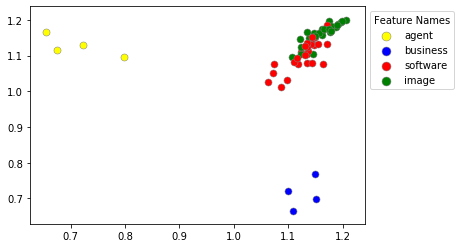

In [112]:
import matplotlib as mpl
import matplotlib.pyplot as plt


### plot the clusters
fig, ax = plt.subplots(1,1)


cluster_color_dict = {0:'yellow', 1 :'blue', 2 :'red', 3 :'green'} # change these to desired colors
#cluster_color_dict = {0:'green', 1 :'blue', 2 :'red'} # change these to desired colors
for i in range(len(t[0])):

    ax.scatter(t[0][i], t[1][i], c= cluster_color_dict[labels[i]], edgecolors='grey', lw = 0.5, s = 50)
    
p1 = [] # legend patches 
for i in range(4):
    print(i)
    h = ax.scatter([],[], c= cluster_color_dict[i], 
                    edgecolors= 'grey', lw = 0.5, s = 80, label = d[i]) 
    p1.append(h)

l1 = ax.legend(handles = p1, title= 'Feature Names',  bbox_to_anchor = (1,1))


In [113]:
# save the figure
fig.savefig('Evaluation1_3.png', dpi=100, bbox_inches='tight')

In [114]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    

Top terms per cluster:
Cluster 0:
 agent
 agents
 design
 fipa
 snet
 based
 congolog
 systems
 aade
 engineering
Cluster 1:
 business
 enterprise
 process
 modelling
 integration
 objects
 model
 processes
 models
 simulation
Cluster 2:
 software
 process
 model
 simulation
 project
 development
 modeling
 engineering
 models
 based
Cluster 3:
 image
 color
 neural
 computing
 data
 time
 model
 grid
 process
 simulation


In [115]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dfObj1.index.values
cluster_map['cluster'] = model.labels_

In [116]:
cluster_map[cluster_map.cluster == 2]

,data_index,cluster
2,2,2
4,4,2
7,7,2
10,10,2
11,11,2
12,12,2
13,13,2
24,24,2
25,25,2
27,27,2


In [25]:
%store dfObj1

Stored 'dfObj1' (DataFrame)


In [258]:
from sklearn import metrics

In [259]:
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))

Adjusted Rand-Index: 0.176
